In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [30]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names=['sepal length','sepal width','petal length','petal width','class']

In [34]:
ds=pd.read_csv(url,names=names)

In [35]:
ds.shape

(150, 5)

In [36]:
ds.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
ds.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
ds.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

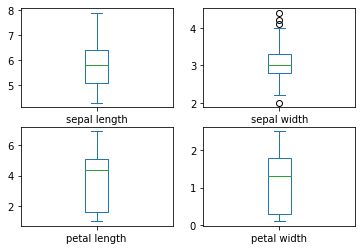

In [40]:
ds.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

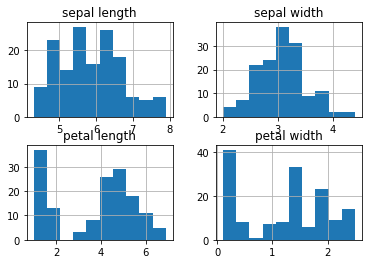

In [41]:
ds.hist()
plt.show()

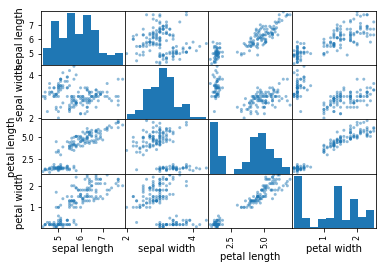

In [48]:
scatter_matrix(ds)
plt.show()

In [49]:
array=ds.values
X=array[:,0:4]
Y=array[:,4]
validation_size=0.2
seed = 6
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [50]:
seed=6
scoring='accuracy'


In [52]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [ ]:
results = []
names = []
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    cv_results=model_selection.cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

### Regresion<br>
### - Uses
- strength of predictor
- forecasting an effect
- forecating trend
- future predection<br>
##### Linear VS Logistic Regresion<br>
- Linear is used to predict multi variable while logistic for binary
- Linear use for cont. while logistic use for cateorical data
- Liner accuracy canbe measured by error/loss and r score(regressor) while logistic presicion recall



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)

In [3]:
data=pd.read_csv('E:\Machine Learning Datasets\Supervised\headbrain.csv')

In [4]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
data.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [6]:
data.shape

(237, 4)

In [37]:
X=data.iloc[:,2].values
Y=data.iloc[:,3].values

In [38]:
xmean=X.mean()
ymean=Y.mean()

In [39]:
x=X-xmean
y=Y-ymean
numerator=np.sum(x*y)
denom=np.sum(x**2)
m=numerator/denom
b=ymean - (m*xmean)
print(m,b)

0.2634293394893993 325.5734210494428


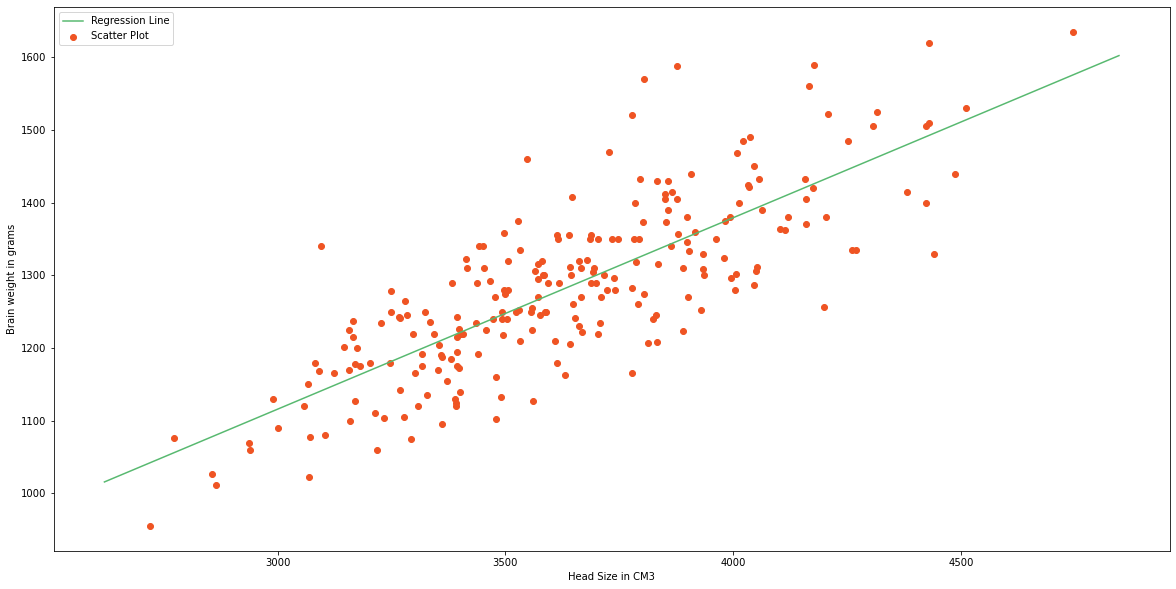

In [46]:
min=np.min(X)-100
max=np.max(X)+100
xval = np.linspace(min,max,237)
ypred = m * xval + b
plt.scatter(X,Y,label='Scatter Plot',c='#ef5423')
plt.plot(xval,ypred,label='Regression Line',c='#58b970')
plt.xlabel('Head Size in CM3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()


In [48]:
r2=1- (sum(y)**2/sum(Y-ypred)**2)
r2

1.0

In [52]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
X=X.reshape((237,1))
reg=reg.fit(X,Y)
y_pred=reg.predict(X)
r2=reg.score(X,Y)
r2

0.639311719957

### Logistic Regression 
##### Titanic Dataset 
- Problem is who will survive

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [106]:
titanic=pd.read_csv('E:/Machine Learning Datasets/Supervised/titanic/train.csv')

In [107]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
355,356,0,3,"Vanden Steen, Mr. Leo Peter",male,28.0,0,0,345783,9.5000,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S
335,336,0,3,"Denkoff, Mr. Mitto",male,NaN,0,0,349225,7.8958,NaN,S
783,784,0,3,"Johnston, Mr. Andrew G",male,NaN,1,2,W./C. 6607,23.4500,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [108]:
titanic.shape

(891, 12)

In [109]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

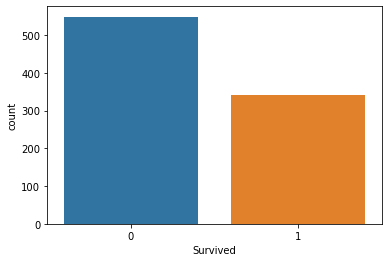

In [110]:
sns.countplot(x='Survived',data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

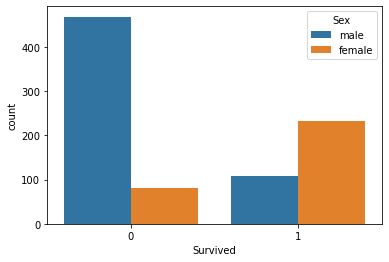

In [111]:
sns.countplot(x='Survived',hue='Sex',data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

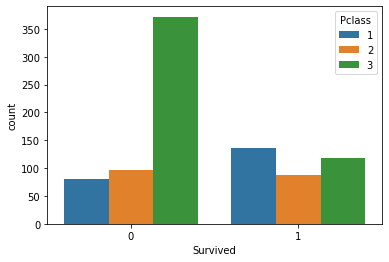

In [112]:
sns.countplot(x='Survived',hue='Pclass',data=titanic)

<AxesSubplot:ylabel='Frequency'>

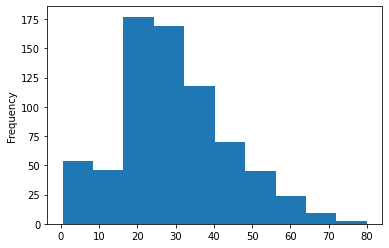

In [113]:
titanic['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

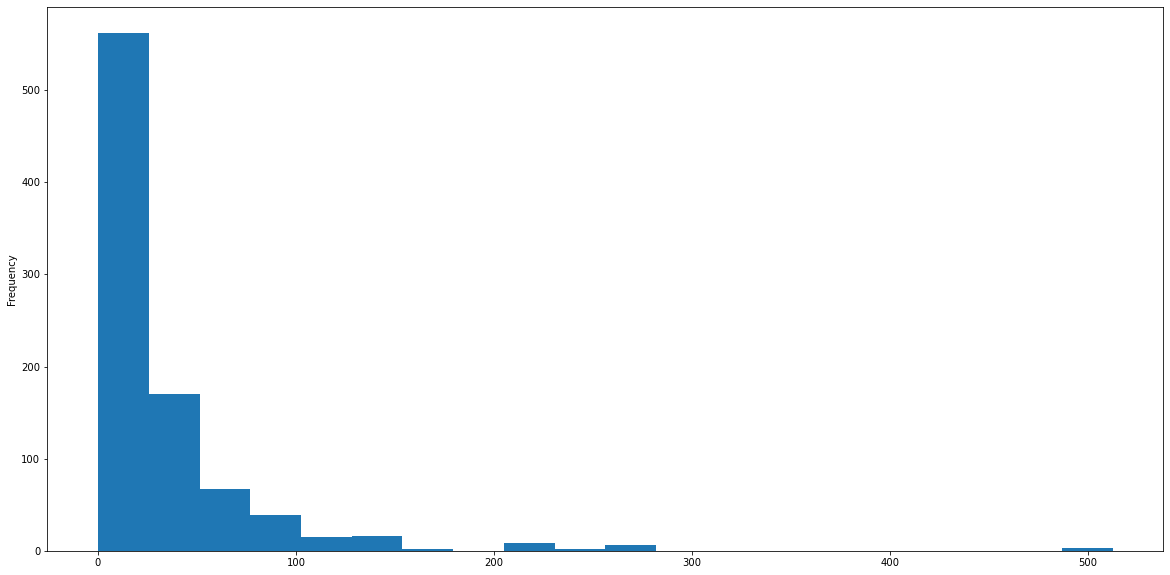

In [114]:
titanic['Fare'].plot.hist(bins=20,figsize=(20,10))

In [115]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

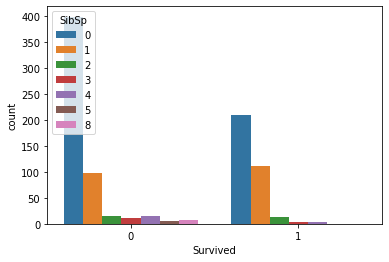

In [116]:
sns.countplot(x='Survived',hue='SibSp',data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

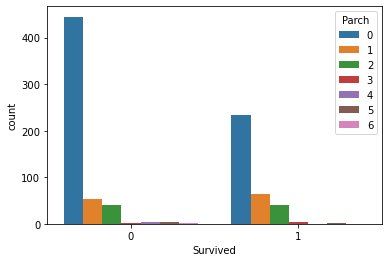

In [117]:
sns.countplot(x='Survived',hue='Parch',data=titanic)

### Data wrangling

In [118]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

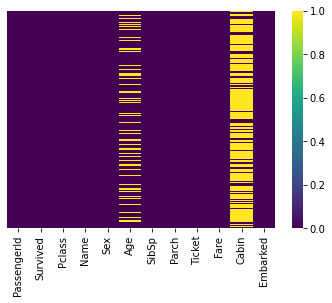

In [119]:
sns.heatmap(titanic.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

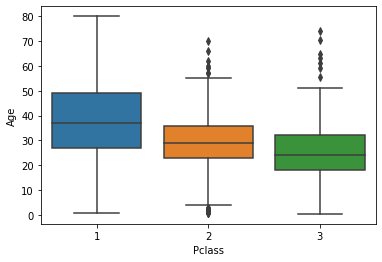

In [120]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [121]:
titanic.drop('Cabin',inplace=True,axis=1)

In [122]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [123]:
titanic.dropna(inplace=True)

In [124]:
titanic.shape

(712, 11)

<AxesSubplot:>

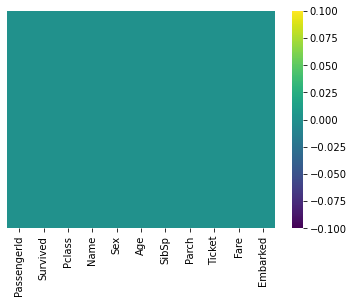

In [125]:
sns.heatmap(titanic.isnull(),yticklabels=False,cmap='viridis')

In [126]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [127]:
sex=pd.get_dummies(titanic['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [128]:
embarked=pd.get_dummies(titanic['Embarked'],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [129]:
Pcls=pd.get_dummies(titanic['Pclass'],drop_first=True)
Pcls.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [130]:
titanic=pd.concat([titanic,sex,embarked,Pcls],axis=1)

In [131]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [132]:
titanic.drop(['Sex','Embarked','Name','PassengerId','Pclass','Ticket'],axis=1,inplace=True)

In [133]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [140]:
X=titanic.drop('Survived',axis=1)
Y=titanic['Survived']

In [141]:
from sklearn.model_selection import train_test_split

In [144]:
from sklearn.linear_model import LogisticRegression

In [147]:
logistic=LogisticRegression(max_iter=500)

In [148]:
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [149]:
prediction=logistic.predict(X_test)

In [151]:
from sklearn.metrics import classification_report

In [153]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       126
           1       0.72      0.72      0.72        88

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



In [154]:
from sklearn.metrics import confusion_matrix

In [158]:
cm=confusion_matrix(y_test,prediction)
cm

array([[102,  24],
       [ 25,  63]], dtype=int64)

<AxesSubplot:>

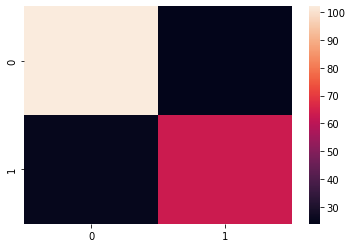

In [157]:
sns.heatmap(cm)

In [159]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.7710280373831776

#### SUV Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
suv=pd.read_csv('E:\Machine Learning Datasets\Supervised\suv_data.csv')

In [3]:
suv.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
suv.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

<AxesSubplot:xlabel='Purchased', ylabel='count'>

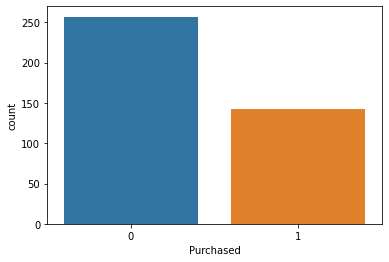

In [5]:
sns.countplot(x='Purchased',data=suv)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

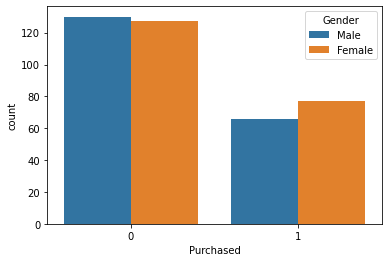

In [6]:
sns.countplot(x='Purchased',hue='Gender',data=suv)

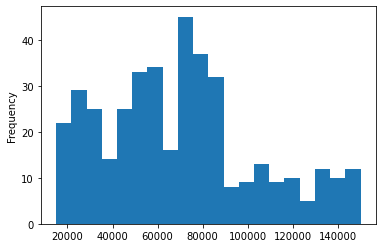

In [7]:
group=suv['EstimatedSalary'].plot.hist(bins=20)
plt.show()

In [8]:
suv.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<AxesSubplot:xlabel='Purchased', ylabel='count'>

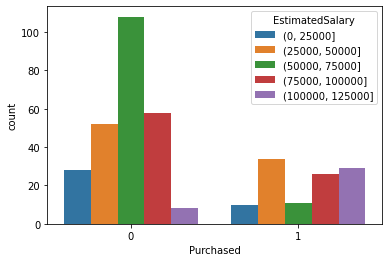

In [9]:
sns.countplot(x=suv['Purchased'],hue=pd.cut(suv['EstimatedSalary'], [0,25000, 50000,75000,100000,125000]))

In [16]:
Y=suv.iloc[:,4].values
X=suv.iloc[:,[2,3]].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=500)

In [25]:
classifier=lr.fit(X_train,y_train)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,classifier.predict(X_test))*100

79.16666666666666

### Decision Tree Classifier 

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

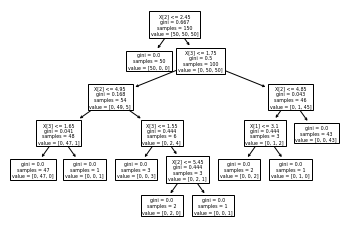

In [2]:
tree.plot_tree(clf)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
clf = RandomForestClassifier(max_depth=2, n_jobs=100,random_state=0)
clf.fit(X, y)


RandomForestClassifier(max_depth=2, n_jobs=100, random_state=0)

[Text(133.92000000000002, 181.2, 'petal width (cm) <= 0.75\ngini = 0.661\nsamples = 94\nvalue = [47, 44, 59]\nclass = virginica'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 31\nvalue = [47, 0, 0]\nclass = setosa'),
 Text(200.88000000000002, 108.72, 'petal length (cm) <= 4.85\ngini = 0.489\nsamples = 63\nvalue = [0, 44, 59]\nclass = virginica'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.122\nsamples = 32\nvalue = [0, 43, 3]\nclass = versicolor'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.034\nsamples = 31\nvalue = [0, 1, 56]\nclass = virginica')]

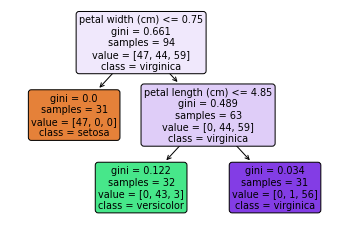

In [19]:
tree.plot_tree(clf.estimators_[0], 
          feature_names=iris.feature_names,
          class_names=iris.target_names, 
          filled=True, impurity=True, 
          rounded=True)

### KNN

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,neigh.predict(X_test))*100

97.77777777777777

In [33]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [48]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(X_train)

NearestNeighbors(n_neighbors=1)

In [ ]:
pred=neigh.kneighbors(X_test)


### Naive Bayes Guassian

In [103]:
d=pd.read_csv('E:\Machine Learning Datasets\Supervised\diabetes.csv')
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [98]:
d.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [101]:
d['Outcome'][0]

1

In [104]:
X=d.drop('Outcome',axis=1)
y=d['Outcome']

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [111]:
X_train.count()

Pregnancies                 614
Glucose                     614
BloodPressure               614
SkinThickness               614
Insulin                     614
BMI                         614
DiabetesPedigreeFunction    614
Age                         614
dtype: int64

In [112]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,gnb.predict(X_test))*100

77.27272727272727

### SVM 
- Multiclass classification
- Use for non linear data
- Good for small data also

In [115]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [116]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [117]:
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf.predict(X_test))*100

80.51948051948052